### Ephemeris

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ephem
import datetime
import seaborn as sns
from geopy.geocoders import Nominatim
import math

sns.set()


In [97]:
geolocator = Nominatim(user_agent="astronomy_notebook")

mars = ephem.Mars()
sun = ephem.Sun()
rigel = ephem.star("Rigel")

In [32]:
geolocator.geocode("Cologne").latitude

50.938361

In [33]:
ephem.constellation(mars)

('Tau', 'Taurus')

In [115]:
geocode = geolocator.geocode("new york")
obs = ephem.Observer()
obs.lat = geocode.latitude
obs.lon = geocode.longitude
obs.date = '2021/03/15 17:00'
mars.compute(obs)
mars.az, mars.alt


(4.601210117340088, -0.031082184985280037)

In [43]:
rigel.compute(obs)
rigel.az, rigel.alt

(3.7656936645507812, 0.6341363191604614)

In [44]:
ephem.localtime(obs.date)

datetime.datetime(2021, 3, 15, 18, 0)

In [45]:
math.degrees(6.27)

359.24453754702614

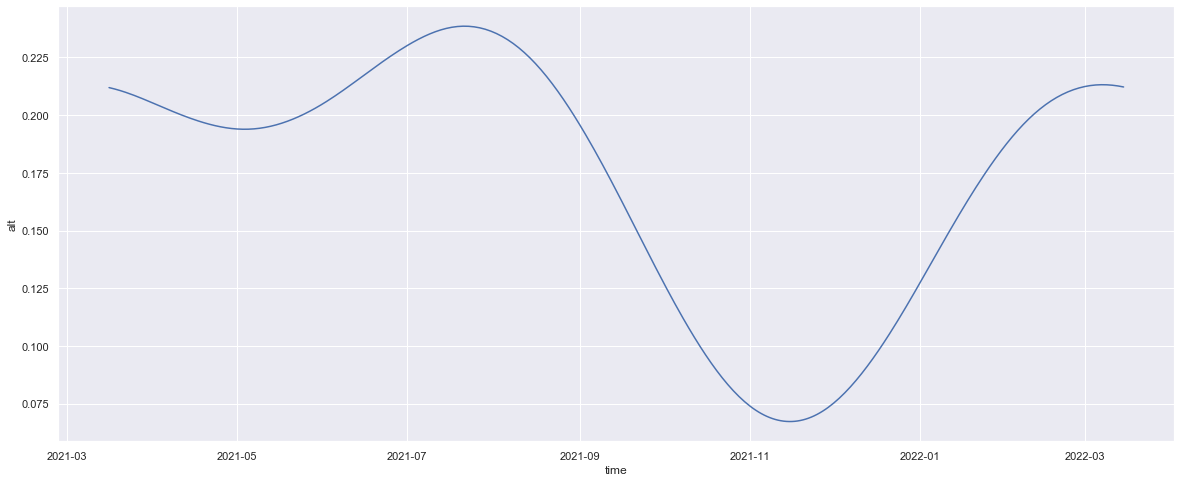

In [116]:
interval = 24

pos_list = []

obs.date = '2021/03/15 0:00'

for i in range(int(24*365//interval)):
    obs.date = obs.date + (interval*ephem.hour)
    sun.compute(obs)
    pos_list.append({'time':pd.to_datetime(str(obs.date)), 'alt':sun.alt})
pos_list

df = pd.DataFrame(pos_list)
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='time',y='alt')


In [90]:
1//interval

48.0